## Setting Libraries

In [ ]:
!python --version

Python 3.7.12


In [ ]:
!pip install pydub
!pip install pytube
#!pip install subprocess

     |████████████████████████████████| 56 kB 2.6 MB/s 
ERROR: Could not find a version that satisfies the requirement subprocess (from versions: none)
ERROR: No matching distribution found for subprocess


In [ ]:
import os
import json
import subprocess
from pytube import YouTube # 유튜브 크롤링 모듈
from pytube.exceptions import VideoUnavailable #유효하지 않을떄
from pydub import AudioSegment # 오디오파일 받아오는 모듈
from pydub.utils import make_chunks
from IPython import display as ipd

In [ ]:
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [ ]:
BASE_DIR = '/content/MyDrive/MyDrive/[해커톤]DeepASMR/'
MP4_SOURCE = BASE_DIR + '[code]yt_output'
WAV_SOURCE = BASE_DIR + '[code]yt_wav'

class YoutubeDownloader():
    def __init__(self, folder):
        self.folder = folder

    def down_files(self, urls):
        if type(urls) == list and len(urls):
            for idx, url in enumerate(urls):
                try:
                    yt = YouTube(url) #yt 인스턴스 생성
                except VideoUnavailable:
                    print(f'{idx + 1}번째 {url}는 사용할 수 없습니다.') # url이 사용불가면 에러나니까
                else:
                    audio = yt.streams.filter(only_audio=True).first() #audio에 음원파일이 들어감
                    print(f'파일명: {yt.title}\n') 
                    print(f'다운로드 시작')
                    try:
                        filename = input("원하는 파일명.mp4를 입력하세요. ")
                        audio.download(output_path=self.folder, filename=filename)
                        print(f'다운로드 완료 {(idx + 1)} / {len(urls)}')
                        print("-" * 100)
                    except Exception:
                        print(f"다운로드 중 오류가 발생하였습니다.")
                        continue
            print("파일 다운로드 종료")
            return
        
        else:
            print('URL을 올바르게 입력해주세요')
            return

In [ ]:
# 가져올 Youtube 영상 url을 urls 배열에 저장  
urls = ['https://www.youtube.com/watch?v=2TrgSww4Wf8']
len(urls)

1

In [ ]:
# YoutubeDownloader 객체 생성
yt = YoutubeDownloader(MP4_SOURCE)

In [ ]:
# urls 배열을 받아 다운로드 진행
yt.down_files(urls)

파일명: 🔥 공부할 때 듣는 장작 타는 소리 / Fireplace sound

다운로드 시작
원하는 파일명.mp4를 입력하세요. asmr_nature_fire_20211014
다운로드 완료 1 / 1
----------------------------------------------------------------------------------------------------
파일 다운로드 종료


In [ ]:
class AudioHandler():
    def __init__(self, filepath):
        self.file_path = filepath # 오디오 파일 전체 경로
        self.file_name = os.path.splitext(self.file_path)[0] # 파일경로
        self.file_format = os.path.splitext(self.file_path)[1] # 확장자
        self.__audio = AudioSegment.from_file(self.file_path) # 오디오 파일 로드
    
    def get_duration(self):
        """ 원본 오디오 파일의 재생시간"""
        return self.__audio.duration_seconds
    
    def file_split(self, start_min, start_sec, end_min, end_sec, fname):
        """ 원본 오디오 파일에서 원하는 구간 Split 해서 wav 파일로 저장"""
        t1 = start_min * 60 * 1000 + start_sec * 1000
        t2 = end_min * 60 * 1000 + end_sec * 1000
        split_audio = self.__audio[t1:t2]
        save_path = os.path.join(WAV_SOURCE, fname)
        split_audio.export(save_path + '.wav', format='wav')
            
    def convert_to_wav(self):
        """mp4 파일을 wav로 포맷변경"""
        try:
            filename = os.path.basename(self.file_name)
            save_path = os.path.join(WAV_SOURCE, filename)
            self.__audio.export(save_path + ".wav", format="wav")
        except:
            print("파일변환에러")

    def chunk_wav_data(self, chunk_length):
        """chunk_length 단위로 원본 오디오 파일을 temp 폴더에 저장"""
        folder_path = os.path.join(BASE_DIR, 'temp')
        if os.path.exists(BASE_DIR + '/temp'): # temp 폴더가 이미 존재한다면 폴더 삭제
            os.system("rm -rf {}".format(folder_path))

        os.mkdir(folder_path) # temp 폴더 생성
        chunk_length_ms = 1000 * chunk_length # pydub calculates in millisec
        chunks = make_chunks(self.__audio, chunk_length_ms) #Make chunks of one sec      

        for i, chunk in enumerate(chunks):
            chunk_name = "{}.wav".format(i)
            print("exporting ", chunk_name)
            chunk.export(os.path.join(folder_path, chunk_name), format="wav")

In [ ]:
# AudioHandler 객체 생성
audio = AudioHandler(MP4_SOURCE + '/asmr_nature_fire_20211014')

In [ ]:
audio.file_path

'/content/MyDrive/MyDrive/[해커톤]DeepASMR/[code]yt_output/asmr_nature_fire_20211014'

In [ ]:
audio.file_name

'/content/MyDrive/MyDrive/[해커톤]DeepASMR/[code]yt_output/asmr_nature_fire_20211014'

In [ ]:
audio.file_format

''

In [ ]:
# MP4 -> WAV 변환
audio.convert_to_wav()
os.listdir(WAV_SOURCE)

['asmr_mix_20210608.wav',
 'asmr_talk_whispering_191004.wav',
 'asmr_talk_wordrepeat_200721.wav',
 '.ipynb_checkpoints',
 'asmr_soft_mouthandbrush_211012.wav',
 'asmr_soft_tongue_210908.wav',
 'asmr_talk_hairsalon_170926.wav',
 'asmr_tap_earcleaning_210617.wav',
 'asmr_tap_soap_210327.wav',
 'asmr_tap_wood_210930.wav',
 'asmr_nature_fire_20211014.wav',
 'asmr_1.wav']

In [ ]:
# 원본 파일에서 0분 30초 ~ 1분 30초 구간을 현재 폴더에 'asmr_1.wav' 라는 파일명으로 저장
audio.file_split(0, 30, 1, 30, 'asmr_1')
os.listdir(WAV_SOURCE)

['asmr_mix_20210608.wav',
 'asmr_talk_whispering_191004.wav',
 'asmr_talk_wordrepeat_200721.wav',
 'asmr_soft_mouthandbrush_211012.wav',
 'asmr_soft_tongue_210908.wav',
 'asmr_talk_hairsalon_170926.wav',
 'asmr_tap_earcleaning_210617.wav',
 'asmr_tap_soap_210327.wav',
 'asmr_tap_wood_210930.wav',
 'asmr_nature_fire_20211014.wav',
 'asmr_1.wav',
 '.ipynb_checkpoints']

In [ ]:
# 30 초 단위로 audio chunk
audio.chunk_wav_data(6)

exporting  0.wav
exporting  1.wav
exporting  2.wav
exporting  3.wav
exporting  4.wav
exporting  5.wav
exporting  6.wav
exporting  7.wav
exporting  8.wav
exporting  9.wav
exporting  10.wav
exporting  11.wav
exporting  12.wav
exporting  13.wav
exporting  14.wav
exporting  15.wav
exporting  16.wav
exporting  17.wav
exporting  18.wav
exporting  19.wav
exporting  20.wav
exporting  21.wav
exporting  22.wav
exporting  23.wav
exporting  24.wav
exporting  25.wav
exporting  26.wav
exporting  27.wav
exporting  28.wav
exporting  29.wav
exporting  30.wav
exporting  31.wav
exporting  32.wav
exporting  33.wav
exporting  34.wav
exporting  35.wav
exporting  36.wav
exporting  37.wav
exporting  38.wav
exporting  39.wav
exporting  40.wav
exporting  41.wav
exporting  42.wav
exporting  43.wav
exporting  44.wav
exporting  45.wav
exporting  46.wav
exporting  47.wav
exporting  48.wav
exporting  49.wav
exporting  50.wav
exporting  51.wav
exporting  52.wav
exporting  53.wav
exporting  54.wav
exporting  55.wav
ex

### References

#### pydub : https://pytube.io/en/latest/index.html
#### Pydub : https://github.com/jiaaro/pydub
#### ffmpeg : https://github.com/FFmpeg/FFmpeg

# 데이터 전처리

In [ ]:
json_list = [ad1.get_info(),ad2.get_info(), ad3.get_info()]
json_list

[{'channel': 'Vito ASMR',
  'comment': None,
  'date': '2021-10:04 11:54:14',
  'file_format': 'mp4',
  'genre': '혼종',
  'url': 'https://youtu.be/LZh4ioW31J8'},
 {'channel': 'ASMR Tingles',
  'comment': None,
  'date': '2021-10:04 12:08:35',
  'file_format': 'mp4',
  'genre': '혼종',
  'url': 'https://youtu.be/WAKjzzAAYRo'},
 {'channel': 'water',
  'comment': None,
  'date': '2021-10:04 12:18:23',
  'file_format': 'wav',
  'genre': 'nature',
  'url': ''}]

In [ ]:
from pandas import json_normalize
df = json_normalize(json_list)
df

,url,genre,channel,file_format,date,comment
0,https://youtu.be/LZh4ioW31J8,혼종,Vito ASMR,mp4,2021-10:04 11:54:14,None
1,https://youtu.be/WAKjzzAAYRo,혼종,ASMR Tingles,mp4,2021-10:04 12:08:35,None
2,,nature,water,wav,2021-10:04 12:18:23,None


### 이게.. 정량적으로 데이터화 할 수 있는게 별로 없네요..
1. 어차피 wav 파일로 변환하는데 file_format의 의미가 있을까?
2. genre는 임의로 nature, mix, tap 등으로 나누면 될 듯
3. 말소리가 있는것과 없는것에 대한 칼럼을 추가하면 좋을듯
4. channel보다는 sound의 keyword나 간단 설명을 추가?


### - 우선 VAE인코더로 생성까지 해보자. 
### - Classification을 해서 label을 생성해볼 수 있을까? 


In [ ]:
len(df)

3

In [ ]:
import librosa
import librosa.display
audio_list=[]
for i in range(len(df)):
  y, sr = librosa.load( new_path + f'/asmr_{i+1}.wav', sr=16000, offset=0, duration = 60.0)
  audio_list.append(y)
audio_list

[array([-0.00716171, -0.0112877 , -0.009284  , ...,  0.00358287,
         0.00443478,  0.00511143], dtype=float32),
 array([ 0.00032882, -0.00200478, -0.00096887, ..., -0.00618019,
        -0.00546345, -0.00506695], dtype=float32),
 array([-0.00069432, -0.00353331, -0.00356009, ...,  0.01182193,
         0.01240927,  0.01366778], dtype=float32)]

In [ ]:
sr

16000

In [ ]:
import numpy as np
audio_np = np.array(audio_list, np.float32)
audio_np.shape

(3, 960000)

## data length / sampling rate = 음원 재생시간!

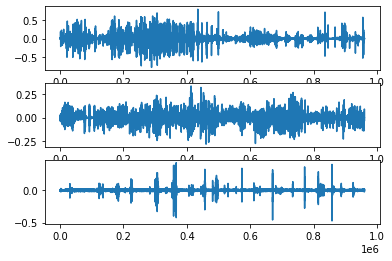

In [ ]:
import matplotlib.pyplot as plt

for i,sound in enumerate(audio_np):
  plt.subplot(3,1,i+1)
  plt.plot(sound)

Let's check mel spectrogram.

In [ ]:
audio_mfcc = [] #audio_mfcc 담긴 리스트
for y in audio_list : 
  #mfcc() method 소환
  ret = librosa.feature.mfcc(y=y, sr = sr)
  audio_mfcc.append(ret)

In [ ]:
audio_mfcc[0].shape

(20, 1876)

In [ ]:
df['genre'][1]

'혼종'

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54844 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54844 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0, flags=flags)


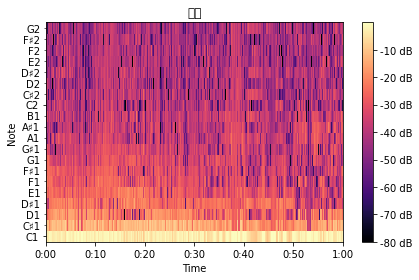

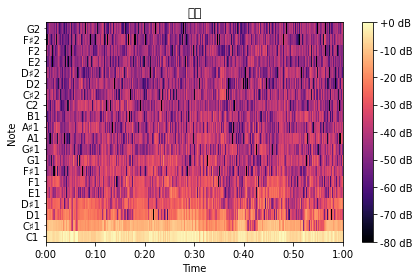

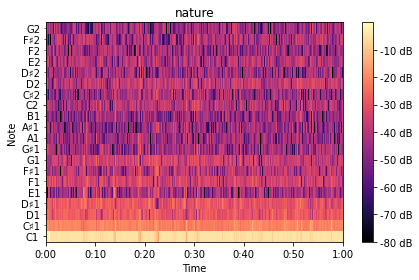

In [ ]:
for i in range(len(audio_mfcc)):
  amp_db = librosa.amplitude_to_db(np.abs(audio_mfcc[i]), ref=np.max) #amplitude를 dB 단위로 변환
  librosa.display.specshow(amp_db, sr=sr, x_axis='time', y_axis= 'cqt_note')
  plt.colorbar(format='%+2.0f dB')
  plt.title(df['genre'][i])
  plt.tight_layout()
  plt.show()

channel은 영문명

# 모델 학습

In [ ]:
!/opt/conda/bin/python3.7 -m pip install --upgrade pip
!pip install tensorflow-addons
!pip install --upgrade --ignore-installed tensorflow
!pip install -q imageio
!pip install -q git+https://github.com/tensorflow/docs

/bin/bash: /opt/conda/bin/python3.7: No such file or directory
     |████████████████████████████████| 1.1 MB 5.1 MB/s 
     |████████████████████████████████| 458.3 MB 10 kB/s 
     |████████████████████████████████| 65 kB 4.5 MB/s 
     |████████████████████████████████| 462 kB 67.7 MB/s 
     |████████████████████████████████| 3.9 MB 49.8 MB/s 
     |████████████████████████████████| 1.1 MB 68.8 MB/s 
     |████████████████████████████████| 1.3 MB 67.6 MB/s 
     |████████████████████████████████| 57 kB 6.4 MB/s 
     |████████████████████████████████| 5.8 MB 53.1 MB/s 
     |████████████████████████████████| 4.0 MB 59.6 MB/s 
     |████████████████████████████████| 14.8 MB 55.6 MB/s 
     |████████████████████████████████| 42 kB 1.6 MB/s 
     |████████████████████████████████| 131 kB 65.6 MB/s 
     |████████████████████████████████| 62 kB 1.0 MB/s 
     |████████████████████████████████| 97 kB 8.4 MB/s 
     |████████████████████████████████| 288 kB 72.2 MB/s 
     |█████████████

In [ ]:
import librosa

import numpy as np
import pandas as pd
import os

import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras import layers 

import matplotlib.pyplot as plt
from IPython import display
from IPython.display import clear_output

import glob
import imageio
import time
import IPython.display as ipd

AUTOTUNE = tf.data.experimental.AUTOTUNE

In [ ]:
seed=123
tf.compat.v1.set_random_seed(seed)
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

In [ ]:
train_size = 60000
BATCH_SIZE = 8
test_size = 10000
epochs = 20
# set the dimensionality of the latent space to a plane for visualization later
latent_dim = 2
num_examples_to_generate = 2

In [ ]:
temp_dir = BASE_DIR + 'temp'

In [ ]:
len(os.listdir(temp_dir))

241

In [ ]:
# https://stackoverflow.com/questions/4813061/non-alphanumeric-list-order-from-os-listdir
from natsort import natsorted
natsorted(os.listdir(temp_dir))

In [ ]:
def DatasetLoader():
    music_list = np.array(natsorted(os.listdir(temp_dir)))
    train_music_1 =  list(music_list[:120]) 
    train_music_2 =  list(music_list[120:240]) 
    TrackSet_1 = [temp_dir + '/%s' % (x) for x in train_music_1]
    TrackSet_2 = [temp_dir + '/%s' % (x) for x in train_music_2]

    return TrackSet_1, TrackSet_2

In [ ]:
def load(file_):
    data_, sampling_rate = librosa.load(file_,sr=22500, offset=0.0, duration=30)
    data_ = data_.reshape(1,22500*30)
    return data_
map_data = lambda filename: tf.compat.v1.py_func(load, [filename], [tf.float32])

In [ ]:
TrackSet_1, TrackSet_2 = DatasetLoader()

In [ ]:
print(len(TrackSet_1), len(TrackSet_2))

120 120


In [ ]:
train_dataset = (
    tf.data.Dataset
    .from_tensor_slices((TrackSet_1))
    .map(map_data, num_parallel_calls=AUTOTUNE)
    .shuffle(3)
    .batch(BATCH_SIZE)
)
test_dataset = (
    tf.data.Dataset
    .from_tensor_slices((TrackSet_2))
    .map(map_data, num_parallel_calls=AUTOTUNE)
    .shuffle(3)
    .batch(BATCH_SIZE)
)

Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    


## Encoder network
This defines the approximate posterior distribution *q(z|x)*, which takes as input an observation and outputs a set of parameters for specifying the conditional distribution of the latent representation *z*. In this example, we simply model the distribution as a diagonal Gaussian, and the network outputs the mean and log-variance parameters of a factorized Gaussian. We output log-variance instead of the variance directly for numerical stability.
## Decoder network
This defines the conditional distribution of the observation *p(x|z)*, which takes a latent sample *z* as input and outputs the parameters for a conditional distribution of the observation. We model the latent distribution prior *p(z)* as a unit Gaussian.
## Reparameterization
To generate a sample *z* for the decoder during training, we can sample from the latent distribution defined by the parameters outputted by the encoder, given an input observation *x*. However, this sampling operation creates a bottleneck because backpropagation cannot flow through a random node.

To address this, we use a reparameterization trick. In our example, we approximate *z* using the decoder parameters and another parameter *ϵ* as follows:

z = μ + σ.ϵ

Source: [Tensorflow](https://www.tensorflow.org/tutorials/generative/cvae)


In [ ]:
class Resnet1DBlock(tf.keras.Layer):
    def __init__(self, kernel_size, filters,type='encode'):
        super(Resnet1DBlock, self).__init__(name='')
    
        if type=='encode':
            self.conv1a = layers.Conv1D(filters, kernel_size, 2,padding="same")
            self.conv1b = layers.Conv1D(filters, kernel_size, 1,padding="same")
            self.norm1a = tfa.layers.InstanceNormalization()
            self.norm1b = tfa.layers.InstanceNormalization()
        if type=='decode':
            self.conv1a = layers.Conv1DTranspose(filters, kernel_size, 1,padding="same")
            self.conv1b = layers.Conv1DTranspose(filters, kernel_size, 1,padding="same")
            self.norm1a = tf.keras.layers.BatchNormalization()
            self.norm1b = tf.keras.layers.BatchNormalization()
        else:
            return None

    def call(self, input_tensor):
        x = tf.nn.relu(input_tensor)
        x = self.conv1a(x)
        x = self.norm1a(x)
        x = layers.LeakyReLU(0.4)(x)

        x = self.conv1b(x)
        x = self.norm1b(x)
        x = layers.LeakyReLU(0.4)(x)

        x += input_tensor
        return tf.nn.relu(x)


NameError: ignored

In [ ]:
class CVAE(tf.keras.Model):
    """Convolutional variational autoencoder."""

    def __init__(self, latent_dim):
        super(CVAE, self).__init__()
        self.latent_dim = latent_dim
        self.encoder = tf.keras.Sequential(
            [
                tf.keras.layers.InputLayer(input_shape=(1,22500*30)),# 90001
                layers.Conv1D(64,1,2),
                Resnet1DBlock(64,1),
                layers.Conv1D(128,1,2),
                Resnet1DBlock(128,1),
                layers.Conv1D(128,1,2),
                Resnet1DBlock(128,1),
                layers.Conv1D(256,1,2),
                Resnet1DBlock(256,1),
                # No activation
                layers.Flatten(),
                layers.Dense(latent_dim+latent_dim)

            ]
        )
        self.decoder = tf.keras.Sequential(
            [
                tf.keras.layers.InputLayer(input_shape=(latent_dim,)),
                layers.Reshape(target_shape=(1,latent_dim)),
                Resnet1DBlock(512,1,'decode'),
                layers.Conv1DTranspose(512,1,1),
                Resnet1DBlock(256,1,'decode'),
                layers.Conv1DTranspose(256,1,1),
                Resnet1DBlock(128,1,'decode'),
                layers.Conv1DTranspose(128,1,1),
                Resnet1DBlock(64,1,'decode'),
                layers.Conv1DTranspose(64,1,1),
                # No activation
                layers.Conv1DTranspose(22500*30,1,1), #90001
            ]
        )
    @tf.function
    def sample(self, eps=None):
        if eps is None:
            eps = tf.random.normal(shape=(200, self.latent_dim))
        return self.decode(eps, apply_sigmoid=True)
    @tf.function
    def encode(self, x):
        mean, logvar = tf.split(self.encoder(x), num_or_size_splits=2, axis=1)
        return mean, logvar
    @tf.function
    def reparameterize(self, mean, logvar):
        eps = tf.random.normal(shape=mean.shape)
        return eps * tf.exp(logvar * .5) + mean
    @tf.function
    def decode(self, z, apply_sigmoid=False):
        logits = self.decoder(z)
        if apply_sigmoid:
            probs = tf.sigmoid(logits)
            return probs
        return logits

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.0003,beta_1=0.9, beta_2=0.999,epsilon=1e-08)

In [ ]:
@tf.function
def log_normal_pdf(sample, mean, logvar, raxis=1):
    log2pi = tf.math.log(2. * np.pi)
    return tf.reduce_sum(
         -.5 * ((sample - mean) ** 2. * tf.exp(-logvar) + logvar + log2pi),
          axis=raxis)
    
@tf.function
def compute_loss(model, x):
    mean, logvar = model.encode(x)
    z = model.reparameterize(mean, logvar)
    x_logit = model.decode(z)
    cross_ent = tf.nn.sigmoid_cross_entropy_with_logits(logits=x_logit, labels=x)
    logpx_z = -tf.reduce_sum(cross_ent, axis=[1,2])
    logpz = log_normal_pdf(z, 0., 0.)
    logqz_x = log_normal_pdf(z, mean, logvar)
    return -tf.reduce_mean(logpx_z + logpz - logqz_x)

## KL Loss

The KL divergence tells us how well the probability distribution Q approximates the probability distribution P by calculating the cross-entropy minus the entropy. Intuitively, you can think of that as the statistical measure of how one distribution differs from another.
In VAE, let X be the data we want to model, z be latent variable, P(X) be the probability distribution of data, P(z) be the probability distribution of the latent variable and P(X|z) be the distribution of generating data given latent variable.

In the case of variational autoencoders, our objective is to infer P(z)
from P(z|X). P(z|X) is the probability distribution that projects our data into latent space. But since we do not have the distribution P(z|X), we estimate it using its simpler estimation Q.

Now while training our VAE, the encoder should try to learn the simpler distribution Q(z|X)
such that it is as close as possible to the actual distribution P(z|X). This is where we use KL divergence as a measure of a difference between two probability distributions. The VAE objective function thus includes this KL divergence term that needs to be minimized.

*DKL[Q(z|X)||P(z|X)] = E[ logQ(z|X) − logP(z|X) ]*

## Reconstruction loss
As the name suggest, it measures the reconstruction of original input x. This network can be trained by minimizing the reconstruction error, which measures the differences between our original input and the consequent reconstruction.

In [ ]:
@tf.function
def train_step(model, x, optimizer):
    
    """Executes one training step and returns the loss.

       This function computes the loss and gradients, and uses the latter to
       update the model's parameters.
     """
    with tf.GradientTape() as tape:
            mean, logvar = model.encode(x)
            z = model.reparameterize(mean, logvar)
            x_logit = model.decode(z)
            cross_ent = tf.nn.sigmoid_cross_entropy_with_logits(logits=x_logit, labels=x)
            logpx_z = -tf.reduce_sum(cross_ent, axis=[1,2])
            logpz = log_normal_pdf(z, 0., 0.)
            logqz_x = log_normal_pdf(z, mean, logvar)
            loss_KL = -tf.reduce_mean(logpx_z + logpz - logqz_x)
            reconstruction_loss = tf.reduce_mean(
                     tf.keras.losses.binary_crossentropy(x, x_logit)
                 )
            total_loss = reconstruction_loss+ loss_KL
    gradients = tape.gradient(total_loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

In [ ]:
# keeping the random vector constant for generation (prediction) so
# it will be easier to see the improvement.
random_vector_for_generation = tf.random.normal(
    shape=[num_examples_to_generate, latent_dim])
model = CVAE(latent_dim)

In [ ]:
import librosa.display
save_music=[]
def generate_and_save_images(model, epoch, test_sample):
    mean, logvar = model.encode(test_sample)
    z = model.reparameterize(mean, logvar)
    predictions = model.sample(z)
    fig = plt.figure(figsize=(18, 15))

    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i + 1)
        wave = np.asarray(predictions[i], dtype=np.float32)
        if epoch>14:
            save_music.append(wave)
        librosa.display.waveplot(wave[0], sr=22500)

    # tight_layout minimizes the overlap between 2 sub-plots
    plt.savefig('rain_{:04d}.png'.format(epoch))
    plt.show()

In [ ]:
# Pick a sample of the test set for generating output images
assert BATCH_SIZE >= num_examples_to_generate
for test_batch in test_dataset.take(1):
    test_sample = test_batch[0]

In [ ]:
 # nan 없는지 확인
 for train_x in train_dataset:
        train_x = np.asarray(train_x, dtype=np.float32)[0]
        if not np.isfinite(train_x).all():
          print(train_x)
        else:
          pass

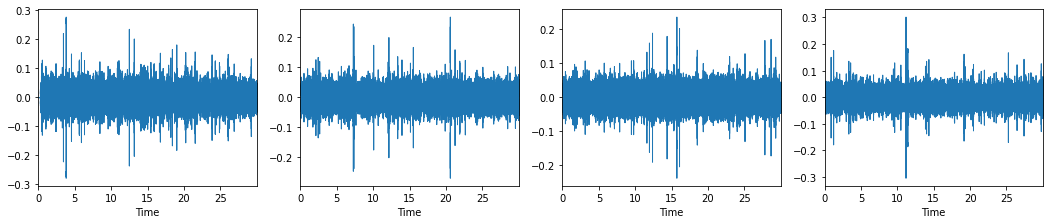

In [ ]:
# 원본 파형
import librosa.display
plt.figure(figsize=(18,15))
for i in range(4):
    plt.subplot(4, 4, i + 1)
    j = load(TrackSet_1[i])
    librosa.display.waveplot(j[0], sr=22500)

tf.Tensor(-293875.97, shape=(), dtype=float32)
Epoch: 20, Test set ELBO: -293875.96875, time elapse for current epoch: 108.79148387908936


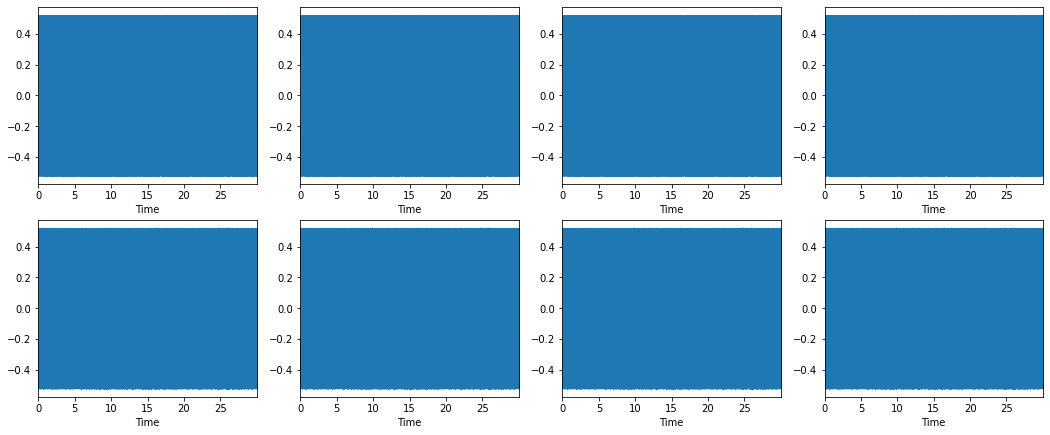

In [ ]:
generate_and_save_images(model, 0, test_sample)

for epoch in range(1, epochs + 1):
    start_time = time.time()
    for train_x in train_dataset:
        train_x = np.asarray(train_x, dtype=np.float32)[0]
        train_step(model, train_x, optimizer)
    end_time = time.time()

    loss = tf.keras.metrics.Mean()
    for test_x in test_dataset:
        test_x = np.asarray(test_x)[0]
        loss(compute_loss(model, test_x))
    display.clear_output(wait=False)
    elbo = -loss.result()
    ##추가##
    print(elbo)
    ##추가##
    print('Epoch: {}, Test set ELBO: {}, time elapse for current epoch: {}'.format(epoch, elbo, end_time - start_time))
    generate_and_save_images(model, epoch, test_sample)

In [ ]:
r1=save_music[13][0]
r2=save_music[19][0]
r3=save_music[14][0]
r4=save_music[15][0]
r5=save_music[18][0]
r6=save_music[17][0]

In [ ]:
# 생성한 샘플파일 저장
sample_path = os.path.join(BASE_DIR, 'sample')
#os.mkdir(sample_path)

In [ ]:
import soundfile as sf
idx = 0
for r in [r1,r2,r3,r4,r5,r6]:
  sf.write('{}/fire_{}_22500_202_20.wav'.format(sample_path, idx), r, 22500) # sr, #data, epoch
  idx = idx + 1

In [ ]:
tf.keras.backend.clear_session()
tf.compat.v1.reset_default_graph()
tf.compat.v1.set_random_seed(seed)
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)